In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [171]:
bld_str = 'csv_files/filtered/bld.csv'
par_str = 'csv_files/filtered/areasqft.csv'
rp_str = 'csv_files/filtered/rpsales.csv'

df_par = pd.read_csv(par_str)
df_rp = pd.read_csv(rp_str)
df_bld = pd.read_csv(bld_str)

In [172]:

df_rp = df_rp.merge(df_par, on = 'id', how = 'left')
df_rp = df_rp.merge(df_bld, on = 'id', how = 'left')

for name in df_rp.columns:
    if 'Unnamed' in name:
        print(name)
        del df_rp[name]
df = df_rp

Unnamed: 0_x
Unnamed: 0_y
Unnamed: 0


In [173]:
df1 = df[(df.SalePrice > 1000) & (df.SalePrice < 1500000)]

In [174]:
df1['Ratio'] = round((df1['SqFt1stFloor']+df1['SqFtGarageAttached'])/df1['SqFtLot'], 3)

/Users/lucasblasdel/opt/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [175]:
df1.columns

Index(['DocumentDate', 'SalePrice', 'id', 'SqFtLot', 'NbrLivingUnits',
       'SqFt1stFloor', 'SqFtTotLiving', 'SqFtGarageAttached', 'Ratio'],
      dtype='object')

In [176]:
df2 = df1[(df1.NbrLivingUnits == 1) | (df1.NbrLivingUnits == 2)]
df2.shape

(26811, 9)

In [177]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26811 entries, 2 to 61588
Data columns (total 9 columns):
DocumentDate          26811 non-null object
SalePrice             26811 non-null int64
id                    26811 non-null int64
SqFtLot               26811 non-null float64
NbrLivingUnits        26811 non-null float64
SqFt1stFloor          26811 non-null float64
SqFtTotLiving         26811 non-null float64
SqFtGarageAttached    26811 non-null float64
Ratio                 26811 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.0+ MB


In [178]:
df2.SalePrice.value_counts()

750000     241
450000     232
550000     226
700000     216
400000     216
          ... 
77500        1
689849       1
1289900      1
779925       1
925700       1
Name: SalePrice, Length: 5185, dtype: int64

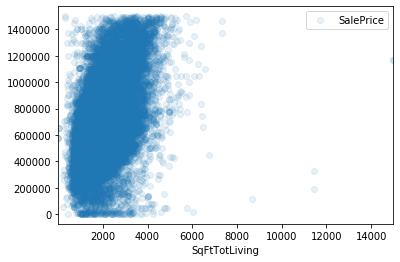

In [179]:
df2.plot(x='SqFtTotLiving', y='SalePrice', style=['o','rx'], alpha = .1)

In [180]:
Y = list(df2.SalePrice)
X = list(df2.SqFtTotLiving)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.842
Model:                            OLS   Adj. R-squared (uncentered):              0.842
Method:                 Least Squares   F-statistic:                          1.431e+05
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                        0.00
Time:                        17:35:24   Log-Likelihood:                     -3.7529e+05
No. Observations:               26811   AIC:                                  7.506e+05
Df Residuals:                   26810   BIC:                                  7.506e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           304.3041      0.804    378.314      0.000     302.727     305.881
==============================================================================
Omnibus:                     2913.198   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16632.020
Skew:                          -0.369   Prob(JB):                         0.00
Kurtosis:                       6.787   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
df_q4 = df2[['SqFtGarageAttached', 'SqFt1stFloor', 'SqFtLot', 'SalePrice']]
df_q4.shape

(26811, 4)

In [182]:
df_q4 = df_q4[(df_q4['SqFtGarageAttached']>= 0)&(df_q4['SqFt1stFloor']>= 0)&(df_q4['SqFtLot']>= 0)]
df_q4.shape

(26811, 4)

In [183]:
df_q4['Ratio'] = round((df_q4['SqFt1stFloor']+df_q4['SqFtGarageAttached'])/df_q4['SqFtLot'], 3)

In [184]:
df_q4

,SqFtGarageAttached,SqFt1stFloor,SqFtLot,SalePrice,Ratio
2,0.0,1900.0,9536.0,1035000,0.199
3,0.0,1560.0,4600.0,965000,0.339
4,460.0,1420.0,7550.0,888000,0.249
5,450.0,1200.0,8979.0,1300000,0.184
10,550.0,1240.0,40793.0,725000,0.044
...,...,...,...,...,...
61576,400.0,840.0,4823.0,575000,0.257
61581,540.0,1410.0,6559.0,749950,0.297
61583,546.0,2050.0,50965.0,552000,0.051
61584,0.0,790.0,1968.0,488000,0.401


In [185]:
Y2 = list(df_q4.SalePrice)
X2 = list(df_q4.Ratio)

model2 = sm.OLS(Y2, X2).fit()
predictions2 = model2.predict(X2) # make the predictions by the model

# Print out the statistics
model2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.676
Model:                            OLS   Adj. R-squared (uncentered):              0.676
Method:                 Least Squares   F-statistic:                          5.603e+04
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                        0.00
Time:                        17:35:24   Log-Likelihood:                     -3.8492e+05
No. Observations:               26811   AIC:                                  7.698e+05
Df Residuals:                   26810   BIC:                                  7.698e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.376e+06      1e+04    236.708      0.000    2.36e+06     2.4e+06
==============================================================================
Omnibus:                     1056.817   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2986.645
Skew:                          -0.145   Prob(JB):                         0.00
Kurtosis:                       4.609   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0, 0.5)

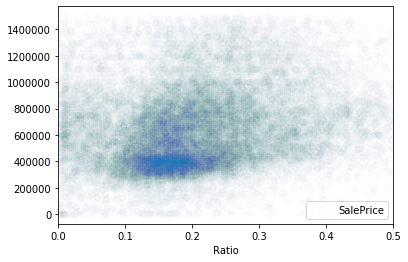

In [186]:
df_q4.plot(x='Ratio', y='SalePrice', style=['o','rx'], alpha = .007)
plt.xlim((0,.5))

In [190]:
df_test = df2[[ 'SalePrice', 'Ratio', 'SqFtTotLiving']]

In [204]:
df_test['Ratio Size Product'] = df_test.Ratio**2 #+ df_test.SqFtTotLiving**2

/Users/lucasblasdel/opt/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [207]:
Y3 = df_test['SalePrice']
X3 = df_test['Ratio Size Product']

model3 = sm.OLS(Y3, X3).fit()
predictions3 = model3.predict(X3) # make the predictions by the model

# Print out the statistics
model2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.676
Model:                            OLS   Adj. R-squared (uncentered):              0.676
Method:                 Least Squares   F-statistic:                          5.603e+04
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                        0.00
Time:                        17:41:13   Log-Likelihood:                     -3.8492e+05
No. Observations:               26811   AIC:                                  7.698e+05
Df Residuals:                   26810   BIC:                                  7.698e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.376e+06      1e+04    236.708      0.000    2.36e+06     2.4e+06
==============================================================================
Omnibus:                     1056.817   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2986.645
Skew:                          -0.145   Prob(JB):                         0.00
Kurtosis:                       4.609   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""